In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('training.csv')

In [3]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9605.0,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533
1,42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,...,6418.0,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630
2,55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,10721.0,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693
3,29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,...,5702.0,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633
4,34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN & COUNTRY FWD V,Bas,MINIVAN 3.3L,...,6300.0,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623


Describe each variable here. Type/meaning/possible values or range

### Data Cleaning

In [4]:
df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentA

PRIMEUNIT, AUCGUART too many missing values, not to be considered
WheelTypeID and RefId are useless
Trim should be studied carefully : Distribution etc to see how to handle missing values
MMRCurrentAuction variables should be handled ald the others that have few  NAs

In [5]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,58386.000000,58386.000000,58386.000000,58386.000000,55813.000000,58386.000000,58373.000000,58373.000000,58373.000000,58373.000000,58141.000000,58141.000000,58141.000000,58141.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000
mean,36567.888449,0.123454,2005.344637,4.174956,1.495566,71478.090518,6128.127953,7372.912699,8497.288558,9851.768061,6131.666655,7389.958652,8776.065118,10145.227034,26359.191519,58125.258195,6730.008335,0.025674,1276.105042
std,21092.254801,0.328961,1.733307,1.713833,0.520802,14591.224550,2456.632611,2715.506462,3151.106237,3378.839613,2432.171539,2682.310828,3086.373733,3304.637060,25804.795573,26146.806098,1762.075265,0.158162,598.885423
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18270.250000,0.000000,2004.000000,3.000000,1.000000,61785.000000,4273.000000,5409.000000,6279.000000,7501.000000,4275.000000,5415.000000,6538.000000,7788.000000,17212.000000,32124.000000,5430.000000,0.000000,837.000000
50%,36608.500000,0.000000,2005.000000,4.000000,1.000000,73359.000000,6097.000000,7308.000000,8448.000000,9798.000000,6063.000000,7311.000000,8733.000000,10103.000000,19662.000000,74135.000000,6700.000000,0.000000,1155.000000
75%,54811.500000,0.000000,2007.000000,5.000000,2.000000,82427.000000,7765.000000,9017.000000,10652.000000,12084.000000,7737.000000,9014.000000,10910.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,36485.000000,1.000000,7498.000000


In [6]:
df.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 34 columns):
RefId                                58386 non-null int64
IsBadBuy                             58386 non-null int64
PurchDate                            58386 non-null object
Auction                              58386 non-null object
VehYear                              58386 non-null int64
VehicleAge                           58386 non-null int64
Make                                 58386 non-null object
Model                                58386 non-null object
Trim                                 56475 non-null object
SubModel                             58379 non-null object
Color                                58379 non-null object
Transmission                         58378 non-null object
WheelTypeID                          55813 non-null float64
WheelType                            55809 non-null object
VehOdo                               58386 non-null int64
Nationalit

In [8]:
df[df['SubModel'].isnull()]
df['SubModel'].mode()[0]
#Replacing by the mode
df['SubModel'].fillna(df['SubModel'].mode()[0], inplace = True)
df.SubModel.isnull().sum()

0

In [9]:
df[df['Color'].isnull()]
df['Color'].mode()[0]
df['Color'].fillna(df['Color'].mode()[0], inplace = True)
#df.Color.isnull().sum()

In [10]:
df[df['Transmission'].isnull()]
df['Transmission'].mode()[0]
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace = True)
#df.Transmission.isnull().sum()

In [11]:
df[df['Nationality'].isnull()]
df['Nationality'].mode()[0]
df['Nationality'].fillna(df['Nationality'].mode()[0], inplace = True)
#df.Nationality.isnull().sum()

In [ ]:
df[df['SubModel'].isnull()]
df['SubModel'].mode()[0]
#Replacing by the mode
df['SubModel'].fillna(df['SubModel'].mode()[0], inplace = True)
df.SubModel.isnull().sum()


df[df['Color'].isnull()]
df['Color'].mode()[0]
df['Color'].fillna(df['Color'].mode()[0], inplace = True)
#df.Color.isnull().sum()


df[df['Transmission'].isnull()]
df['Transmission'].mode()[0]
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace = True)
#df.Transmission.isnull().sum()


df[df['Nationality'].isnull()]
df['Nationality'].mode()[0]
df['Nationality'].fillna(df['Nationality'].mode()[0], inplace = True)
#df.Nationality.isnull().sum()


df[df['Size'].isnull()]
df['Size'].mode()[0]
df['Size'].fillna(df['Size'].mode()[0], inplace = True)
#df.Size.isnull().sum()

In [13]:
df[df['TopThreeAmericanName'].isnull()]
df['TopThreeAmericanName'].mode()[0]
df['TopThreeAmericanName'].fillna(df['TopThreeAmericanName'].mode()[0], inplace = True)
#df.TopThreeAmericanName.isnull().sum()

In [14]:
#df.isnull().sum()

In [15]:
#df.dtypes

Missing values of:                                   

MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice, MMRAcquisitonRetailCleanPrice, MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice, MMRCurrentRetailCleanPrice             

In [16]:
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(), inplace = True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(), inplace = True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(), inplace = True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(), inplace = True)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(), inplace = True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(), inplace = True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(), inplace = True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(), inplace = True)

In [17]:
df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 0
Color                                    0
Transmission                             0
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [18]:
df['WheelType'].unique()
df['WheelType'].mode()[0]
df['WheelType'].fillna(df['WheelType'].mode()[0], inplace = True)
#df.WheelType.isnull().sum()
#WheelTypeID not useful, we won't handle their missing values

In [19]:
df['Trim'].unique()
df['Trim'].mode()[0]
df['Trim'].fillna(df['Trim'].mode()[0], inplace = True)
df.Trim.isnull().sum()

0

In [12]:
df[df['Size'].isnull()]
df['Size'].mode()[0]
df['Size'].fillna(df['Size'].mode()[0], inplace = True)
#df.Size.isnull().sum()


df[df['TopThreeAmericanName'].isnull()]
df['TopThreeAmericanName'].mode()[0]
df['TopThreeAmericanName'].fillna(df['TopThreeAmericanName'].mode()[0], inplace = True)
#df.TopThreeAmericanName.isnull().sum()


df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(), inplace = True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(), inplace = True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(), inplace = True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(), inplace = True)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(), inplace = True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(), inplace = True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(), inplace = True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(), inplace = True)


df['WheelType'].unique()
df['WheelType'].mode()[0]
df['WheelType'].fillna(df['WheelType'].mode()[0], inplace = True)
#df.WheelType.isnull().sum()
#WheelTypeID not useful, we won't handle their missing values


df['Trim'].unique()
df['Trim'].mode()[0]
df['Trim'].fillna(df['Trim'].mode()[0], inplace = True)
df.Trim.isnull().sum()


drop_column = ['RefId', 'WheelTypeID', 'PRIMEUNIT', 'AUCGUART']
df.drop(drop_column, axis=1, inplace = True) # it modifies the dataframe directly

PRIMEUNIT and AUCGUART will be deleted because it could be default values or missing values but we don't know... 
ID columns are not useful

In [20]:
drop_column = ['RefId', 'WheelTypeID', 'PRIMEUNIT', 'AUCGUART']
df.drop(drop_column, axis=1, inplace = True) # it modifies the dataframe directly

In [21]:
df.isnull().sum()

IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                   

### Distribution of the variables etc...

In [22]:
MMRAAAP = df['MMRAcquisitionAuctionAveragePrice'].plot.kde()

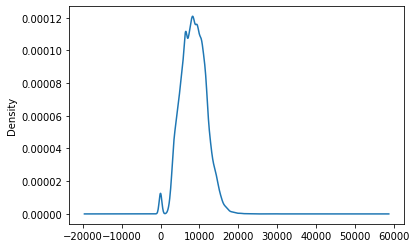

In [23]:
MMRARAP = df['MMRAcquisitionRetailAveragePrice'].plot.kde()

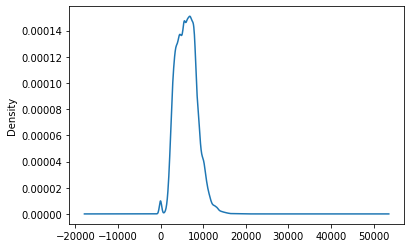

In [24]:
MMRCAAP = df['MMRCurrentAuctionAveragePrice'].plot.kde()

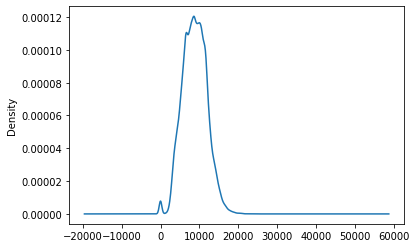

In [25]:
MMRCRAP = df['MMRCurrentRetailAveragePrice'].plot.kde()

In [26]:
import matplotlib.pylab as plt

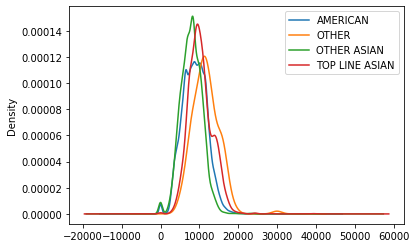

In [27]:
ax = df.groupby(['Nationality']).MMRCurrentRetailAveragePrice.plot.kde()
plt.legend()
plt.show()

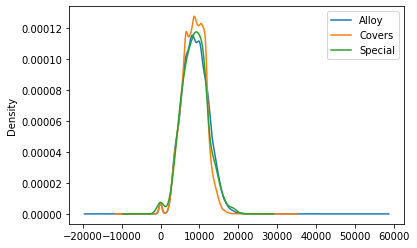

In [28]:
ax = df.groupby(['WheelType']).MMRCurrentRetailAveragePrice.plot.kde()
plt.legend()
plt.show()

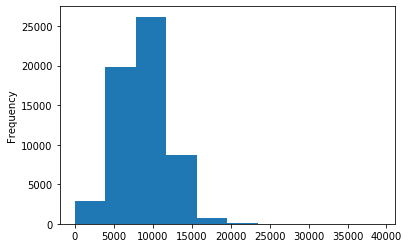

In [29]:
mm = df.MMRCurrentRetailAveragePrice.plot.hist()

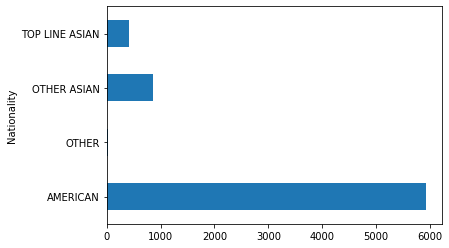

In [30]:
#Bar charts
sx = df.groupby(['Nationality']).IsBadBuy.sum().plot.barh()

####  <span style="color:red">/!\ Carry on the distrib with all meaningful variables... </span> 

### Outliers

510

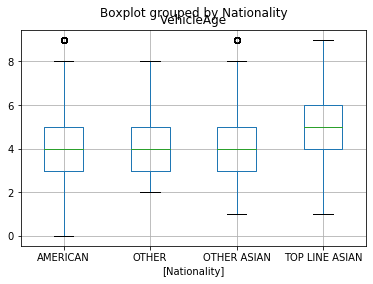

In [52]:
VehAge_bx = df.boxplot(['VehicleAge'], by=['Nationality'])
sum(df['VehicleAge']>8)

In [32]:
## Carry on with other variables

### Correlations

In [33]:
df.isnull().sum()

IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                   

In [34]:
# Target label
Target = ['IsBadBuy']

df_wot = df[['PurchDate','Auction', 'VehBCost', 'VehicleAge', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']]
df_wot.head()

,PurchDate,Auction,VehBCost,VehicleAge,Make,Model,Trim,SubModel,Color,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
0,10/25/2010,ADESA,6100.0,2,KIA,SPECTRA,EX,4D SEDAN EX,BLUE,6796.0,7555.0,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0
1,5/27/2009,MANHEIM,4000.0,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,SILVER,5480.0,6461.0,6418.0,7478.0,5480.0,6461.0,6418.0,7478.0
2,3/18/2010,OTHER,7500.0,2,DODGE,CALIBER,SE,4D WAGON,BLACK,8067.0,8580.0,11073.0,11652.0,7497.0,8102.0,10721.0,11350.0
3,6/8/2009,OTHER,4725.0,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,BROWN,4817.0,6658.0,5702.0,7691.0,4817.0,6658.0,5702.0,7691.0
4,3/4/2009,MANHEIM,5670.0,4,CHRYSLER,TOWN & COUNTRY FWD V,Bas,MINIVAN 3.3L,BLUE,5430.0,6633.0,6364.0,7664.0,5370.0,6811.0,6300.0,7856.0


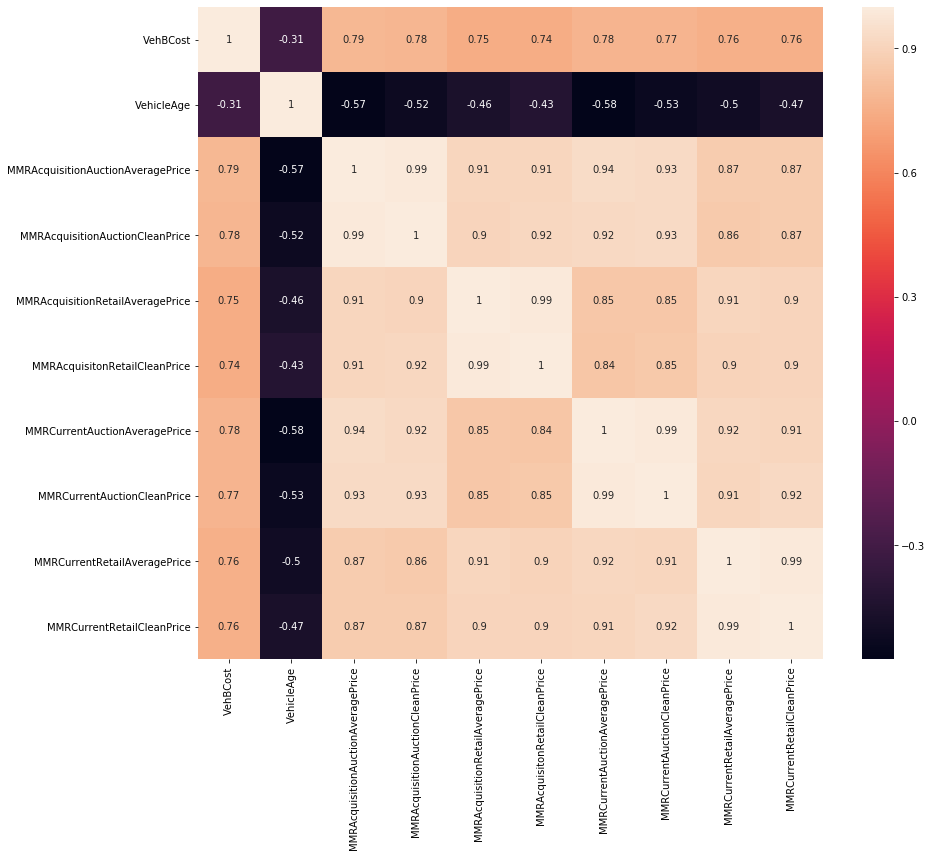

In [35]:
import seaborn as sns
corr = df_wot.corr()
plt.subplots(figsize =(14, 12))
hm = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [36]:
df_wot.corr(method='pearson', min_periods=1)

,VehBCost,VehicleAge,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice
VehBCost,1.000000,-0.311903,0.789075,0.780843,0.745453,0.744357,0.776673,0.773064,0.755256,0.755018
VehicleAge,-0.311903,1.000000,-0.567042,-0.519839,-0.462246,-0.427478,-0.575159,-0.532015,-0.503806,-0.469228
MMRAcquisitionAuctionAveragePrice,0.789075,-0.567042,1.000000,0.990218,0.910185,0.909832,0.935774,0.930221,0.869634,0.868841
MMRAcquisitionAuctionCleanPrice,0.780843,-0.519839,0.990218,1.000000,0.902339,0.917934,0.921730,0.930172,0.858734,0.869265
MMRAcquisitionRetailAveragePrice,0.745453,-0.462246,0.910185,0.902339,1.000000,0.990085,0.849654,0.847106,0.910929,0.903719
MMRAcquisitonRetailCleanPrice,0.744357,-0.427478,0.909832,0.917934,0.990085,1.000000,0.844820,0.853398,0.900976,0.904519
MMRCurrentAuctionAveragePrice,0.776673,-0.575159,0.935774,0.921730,0.849654,0.844820,1.000000,0.990244,0.915147,0.912305
MMRCurrentAuctionCleanPrice,0.773064,-0.532015,0.930221,0.930172,0.847106,0.853398,0.990244,1.000000,0.908620,0.921637
MMRCurrentRetailAveragePrice,0.755256,-0.503806,0.869634,0.858734,0.910929,0.900976,0.915147,0.908620,1.000000,0.989693
MMRCurrentRetailCleanPrice,0.755018,-0.469228,0.868841,0.869265,0.903719,0.904519,0.912305,0.921637,0.989693,1.000000


In [37]:
# The MMR variables are correlated a lot with each variables, we will have to delete many of them
#VehYear and Age are also correlated, we can keep only one (age?)
# /!\ We will have to include what's left in the df variables

### Feature Engineering and Transformations 

Normalize the left features, combine the ones that can be combined etc (Feature engineering)

In [38]:
df.isnull().sum()


IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                   

In [39]:
df_new = df[['PurchDate','VehBCost', 'VehOdo', 'VNZIP1', 'WarrantyCost', 'Auction', 'Make', 'Size', 'IsOnlineSale', 'TopThreeAmericanName', 'VNST', 'Trim', 'Color', 'WheelType', 'Nationality', 'Transmission',]]
df_new['MMR_factor'] = ( df['MMRAcquisitionAuctionAveragePrice'] + df['MMRAcquisitonRetailCleanPrice'] + df['MMRCurrentAuctionCleanPrice'] + df['MMRCurrentRetailAveragePrice']) / 4

#in case I did this in the original data frame, but this is no longer the case. I created a new df and did not include these variables in it
#df.drop(['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice'], axis=1, inplace = True)


Normalizing the new variable

In [40]:
df_new['MMR_factor_n'] = ( df_new['MMR_factor'] - df_new['MMR_factor'].min() ) / ( df_new['MMR_factor'].max() - df_new['MMR_factor'].min() )
df_new.drop(['MMR_factor'], axis=1, inplace = True)

In [41]:
df_new.head()

,PurchDate,VehBCost,VehOdo,VNZIP1,WarrantyCost,Auction,Make,Size,IsOnlineSale,TopThreeAmericanName,VNST,Trim,Color,WheelType,Nationality,Transmission,MMR_factor_n
0,10/25/2010,6100.0,61184,33619,533,ADESA,KIA,MEDIUM,0,OTHER,FL,EX,BLUE,Covers,OTHER ASIAN,AUTO,0.228606
1,5/27/2009,4000.0,92383,32124,1630,MANHEIM,DODGE,MEDIUM,0,CHRYSLER,FL,SXT,SILVER,Covers,AMERICAN,AUTO,0.170015
2,3/18/2010,7500.0,45965,74135,693,OTHER,DODGE,MEDIUM,0,CHRYSLER,OK,SE,BLACK,Covers,AMERICAN,AUTO,0.253618
3,6/8/2009,4725.0,80169,85018,1633,OTHER,FORD,VAN,0,FORD,AZ,S,BROWN,Covers,AMERICAN,AUTO,0.163639
4,3/4/2009,5670.0,77372,75236,1623,MANHEIM,CHRYSLER,VAN,0,CHRYSLER,TX,Bas,BLUE,Alloy,AMERICAN,AUTO,0.172436


Normalizing all numerical continuous variables (only VehBCost left)

In [42]:
df_new['VehBCost_n'] = ( df_new['VehBCost'] - df_new['VehBCost'].min() ) / ( df_new['VehBCost'].max() - df_new['VehBCost'].min() )
df_new.drop(['VehBCost'], axis=1, inplace = True)

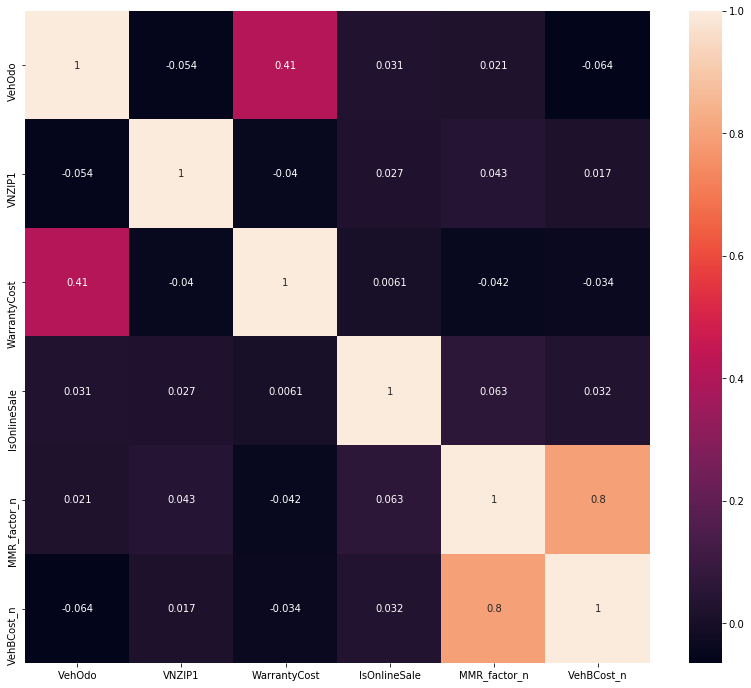

In [43]:
corr = df_new.corr()
plt.subplots(figsize =(14, 12))
hm = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

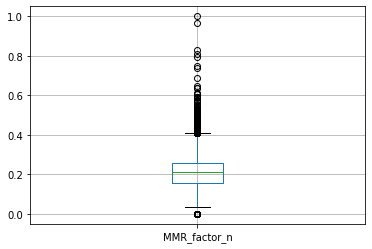

In [44]:
df_new.boxplot(column=['MMR_factor_n'])


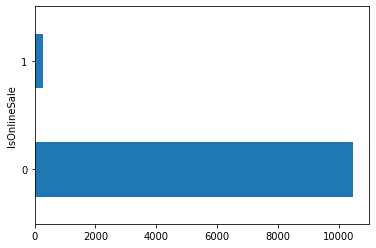

In [47]:
#df_new['IsOnlineSale'].VehBCost_n.plot(kind = 'bar',title= 'Auction')
sx = df_new.groupby(['IsOnlineSale']).VehBCost_n.sum().plot.barh()